In [1]:
!pip install qiskit
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.7 MB 30.3 MB/s 
     |████████████████████████████████| 18.0 MB 322 kB/s 
     |████████████████████████████████| 240 kB 51.0 MB/s 
     |████████████████████████████████| 112 kB 56.5 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 49 kB 6.3 MB/s 
     |████████████████████████████████| 943 kB 51.4 MB/s 
     |████████████████████████████████| 49 kB 6.9 MB/s 
     |████████████████████████████████| 1.6 MB 46.6 MB/s 
     |████████████████████████████████| 37.5 MB 1.3 MB/s 
     |████████████████████████████████| 4.1 MB 53.9 MB/s 
     |████████████████████████████████| 112 kB 59.4 MB/s 
  Created wheel for qiskit: filename=qiskit-0.37.1-py3-none-any.whl size=12067 sha256=8a73ad54da3a4b6d4429757a49eae01b69c6821bc5efa643d52c87921245f130
  Stored in directory: /root/.cache/pip/wheels/1c/3c/a3/bf8c

In [2]:
from numpy import *
from matplotlib.pyplot import *

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, IBMQ
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator

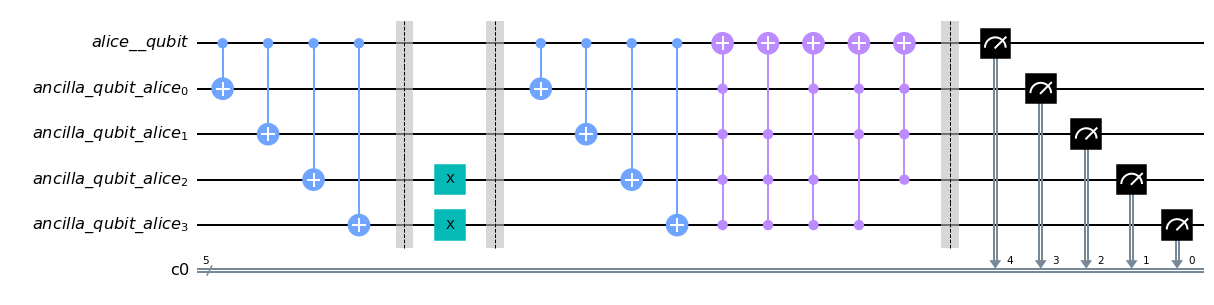

In [4]:
cl= ClassicalRegister(5)
alice_qubit= QuantumRegister(1, 'alice__qubit')
ancilla_qubit= QuantumRegister(4, 'ancilla_qubit_alice')
rep_ckt= QuantumCircuit(alice_qubit, ancilla_qubit, cl)

#encoding

rep_ckt.cx(alice_qubit, ancilla_qubit)
rep_ckt.barrier()

rep_ckt.x([3,4])
rep_ckt.barrier()

#Decoding
rep_ckt.cx(alice_qubit, ancilla_qubit)

rep_ckt.mct([1,2,3,4],0)
rep_ckt.mct([2,3,4],0)
rep_ckt.mct([1,3,4],0)
rep_ckt.mct([1,2,4],0)
rep_ckt.mct([1,2,3],0)

rep_ckt.barrier()

rep_ckt.measure([0,1,2,3,4],[4,3,2,1,0])

#rep_ckt.measure(0,4)
#rep_ckt.measure(1,3)
#rep_ckt.measure(2,2)
#rep_ckt.measure(3,1)
#rep_ckt.measure(4,0)


rep_ckt.draw(output='mpl')

In [5]:
sim = Aer.get_backend('qasm_simulator') 
res= execute(rep_ckt, backend=sim, shots=64).result().get_counts()
print(res)

{'00011': 64}


In [6]:
result=[]
for a1 in range(2):
   for a2 in range(2):
      for a3 in range(2):
         for a4 in range(2):
            for a5 in range(2):
                       
                 a=["I","I","I","I","I"]
                             

                 alice_qubit= QuantumRegister(1, 'alice__qubit')
                 lq1= QuantumRegister(4, 'ancilla_qubit_alice')
                 cr= ClassicalRegister(1)
                 repetition_code_qc= QuantumCircuit(alice_qubit, ancilla_qubit, cr)
                                            
                 #Encoding 
                                              
                 rep_ckt.cx(alice_qubit, ancilla_qubit)
                 rep_ckt.barrier()

                     
                                            
                 repetition_code_qc.barrier()
                                            
                 if a1:
                   a[0]="X"
                   repetition_code_qc.x(0)
                 if a2:
                   a[1]="X"
                   repetition_code_qc.x(1)
                 if a3:
                   a[2]="X"
                   repetition_code_qc.x(2)
                 if a4:
                   a[3]="X"
                   repetition_code_qc.x(3)
                 if a5:
                   a[4]="X"
                   repetition_code_qc.x(4)
                                                
                                            
                 #Decoding                          
                 
                 repetition_code_qc.cx(alice_qubit, ancilla_qubit)
                 
                 repetition_code_qc.mct([1,2,3,4],0)
                 repetition_code_qc.mct([2,3,4],0)
                 repetition_code_qc.mct([1,3,4],0)
                 repetition_code_qc.mct([1,2,4],0)
                 repetition_code_qc.mct([1,2,3],0)

                 sim = Aer.get_backend('qasm_simulator') 
                 repetition_code_qc.measure(0,0)
                 res= execute(repetition_code_qc, backend=sim, shots=64).result().get_counts()
                 a.append(res)
                 result.append(a)

In [7]:
result

[['I', 'I', 'I', 'I', 'I', {'0': 64}],
 ['I', 'I', 'I', 'I', 'X', {'0': 64}],
 ['I', 'I', 'I', 'X', 'I', {'0': 64}],
 ['I', 'I', 'I', 'X', 'X', {'0': 64}],
 ['I', 'I', 'X', 'I', 'I', {'0': 64}],
 ['I', 'I', 'X', 'I', 'X', {'0': 64}],
 ['I', 'I', 'X', 'X', 'I', {'0': 64}],
 ['I', 'I', 'X', 'X', 'X', {'1': 64}],
 ['I', 'X', 'I', 'I', 'I', {'0': 64}],
 ['I', 'X', 'I', 'I', 'X', {'0': 64}],
 ['I', 'X', 'I', 'X', 'I', {'0': 64}],
 ['I', 'X', 'I', 'X', 'X', {'1': 64}],
 ['I', 'X', 'X', 'I', 'I', {'0': 64}],
 ['I', 'X', 'X', 'I', 'X', {'1': 64}],
 ['I', 'X', 'X', 'X', 'I', {'1': 64}],
 ['I', 'X', 'X', 'X', 'X', {'1': 64}],
 ['X', 'I', 'I', 'I', 'I', {'0': 64}],
 ['X', 'I', 'I', 'I', 'X', {'0': 64}],
 ['X', 'I', 'I', 'X', 'I', {'0': 64}],
 ['X', 'I', 'I', 'X', 'X', {'1': 64}],
 ['X', 'I', 'X', 'I', 'I', {'0': 64}],
 ['X', 'I', 'X', 'I', 'X', {'1': 64}],
 ['X', 'I', 'X', 'X', 'I', {'1': 64}],
 ['X', 'I', 'X', 'X', 'X', {'1': 64}],
 ['X', 'X', 'I', 'I', 'I', {'0': 64}],
 ['X', 'X', 'I', 'I', 'X'

In [8]:
count=0
corrected = []
for c in result:
    if c[5]=={'0': 64}:
        count=count+1
        corrected.append(c[:5])
print(count)

16


In [9]:
len(result)

32

In [10]:
corrected

[['I', 'I', 'I', 'I', 'I'],
 ['I', 'I', 'I', 'I', 'X'],
 ['I', 'I', 'I', 'X', 'I'],
 ['I', 'I', 'I', 'X', 'X'],
 ['I', 'I', 'X', 'I', 'I'],
 ['I', 'I', 'X', 'I', 'X'],
 ['I', 'I', 'X', 'X', 'I'],
 ['I', 'X', 'I', 'I', 'I'],
 ['I', 'X', 'I', 'I', 'X'],
 ['I', 'X', 'I', 'X', 'I'],
 ['I', 'X', 'X', 'I', 'I'],
 ['X', 'I', 'I', 'I', 'I'],
 ['X', 'I', 'I', 'I', 'X'],
 ['X', 'I', 'I', 'X', 'I'],
 ['X', 'I', 'X', 'I', 'I'],
 ['X', 'X', 'I', 'I', 'I']]

In [11]:
Summary= {0:0,1:0,2:0,3:0,4:0,5:0}
for i in corrected:
    count=0
    for x in i:
        if x=="X":
            count=count+1
    Summary[count]+=1

print(Summary)

{0: 1, 1: 5, 2: 10, 3: 0, 4: 0, 5: 0}


In [12]:
p=linspace(0,0.5,21)
fid1= (1-p)

fid2=0
fid3=0

c1= {0: 1, 1: 3, 2: 0, 3: 0}
c2= Summary

for i in range(4):
     fid2+= c1[i]*(p**i)*((1-p)**(3-i))
for i in range(6):
     fid3+= c2[i]*(p**i)*((1-p)**(5-i))

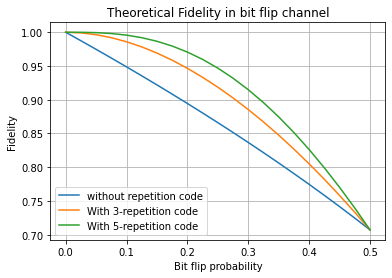

In [15]:
plot(p,sqrt(fid1), label="without repetition code")
plot(p,sqrt(fid2), label="With 3-repetition code")
plot(p,sqrt(fid3), label="With 5-repetition code")
title("Theoretical Fidelity in bit flip channel")
xlabel("Bit flip probability")
ylabel("Fidelity")
grid()
legend()